In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier



# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
df = pd.read_csv("data/anime_cleaned.csv", usecols=['title','type','source','episodes','rating', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
df_number_set = pd.read_csv("data/anime_cleaned.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
display(df)
display(df_number_set)

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,Dokidoki Little Ooyasan,OVA,Other,0,Rx - Hentai,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,12,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,26,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,51,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,38,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,25,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...
6663,0,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,1,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,1,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,0,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [3]:
data.describe(include = "all")

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668,6668,6668,6668.000000,6668,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
unique,6668,6,15,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sakura Taisen: Kanadegumi,TV,Manga,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2980,2493,NaN,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.276395,NaN,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,NaN,NaN,NaN,40.906929,NaN,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,NaN,NaN,NaN,1.000000,NaN,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,NaN,NaN,NaN,6.000000,NaN,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,NaN,NaN,NaN,13.000000,NaN,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000


In [4]:
data.isnull().sum()

title                0
type                 0
source               0
episodes             0
rating               0
score                0
scored_by            0
rank               356
popularity           0
members              0
favorites            0
duration_min         0
aired_from_year      0
dtype: int64

In [5]:
# dropping all null values
data.dropna(inplace = True) 


In [6]:
data

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126.0,12779,126,0,13.0,2016.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [7]:
def change_column_dtype(columns_to_transform,type):
    data[columns_to_transform] = data[columns_to_transform].astype(type)

    return data.dtypes

data.dtypes

title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank               float64
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year    float64
dtype: object

In [8]:
change_column_dtype(['rank','aired_from_year'],int)


title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank                 int32
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year      int32
dtype: object

## Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [9]:
# copy dataframe to replace with dummies columns
data_le = data.copy()

### LabelEncode column ['source']

In [10]:
le = preprocessing.LabelEncoder()
# Created dummies for source column

le.fit(data_le.source)
data_le.source = le.fit_transform(data_le.source)


# Made tuple for graphing labels instead of numerical data
data_list_source = list(le.classes_)          # data.source.unique()

In [11]:
data_list_source

['4-koma manga',
 'Book',
 'Card game',
 'Digital manga',
 'Game',
 'Light novel',
 'Manga',
 'Music',
 'Novel',
 'Original',
 'Other',
 'Picture book',
 'Radio',
 'Visual novel',
 'Web manga']

In [12]:
data_list_source[0]

'4-koma manga'

In [13]:
list(le.inverse_transform([0]))

['4-koma manga']

In [14]:
print('After LabelEncoder(): \n')
for i in range(0,len(list(le.classes_))):
    print(f'Column {le.inverse_transform([i])} is replaced with dummy variable {[i]}')

After LabelEncoder(): 

Column ['4-koma manga'] is replaced with dummy variable [0]
Column ['Book'] is replaced with dummy variable [1]
Column ['Card game'] is replaced with dummy variable [2]
Column ['Digital manga'] is replaced with dummy variable [3]
Column ['Game'] is replaced with dummy variable [4]
Column ['Light novel'] is replaced with dummy variable [5]
Column ['Manga'] is replaced with dummy variable [6]
Column ['Music'] is replaced with dummy variable [7]
Column ['Novel'] is replaced with dummy variable [8]
Column ['Original'] is replaced with dummy variable [9]
Column ['Other'] is replaced with dummy variable [10]
Column ['Picture book'] is replaced with dummy variable [11]
Column ['Radio'] is replaced with dummy variable [12]
Column ['Visual novel'] is replaced with dummy variable [13]
Column ['Web manga'] is replaced with dummy variable [14]


### LabelEncode column ['type']

In [1]:
# Auto encodes any categorical column in a dataframe to numerical values.

def dummyEncode_column(column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data[column.name] = le.fit_transform(data[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = list of original categorical values (replaced by LabelEncoder())')
    
    display(data)


In [16]:
dummyEncode_column(data_le.type)

After passing column ["type"] through LabelEncoder(): 

Categorical value ['Movie'] is replaced with numerical value [0]
Categorical value ['Music'] is replaced with numerical value [1]
Categorical value ['ONA'] is replaced with numerical value [2]
Categorical value ['OVA'] is replaced with numerical value [3]
Categorical value ['Special'] is replaced with numerical value [4]
Categorical value ['TV'] is replaced with numerical value [5]

[categorical_values_in_col_type] = list of original values (replaced by LabelEncoder())


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,Manga,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,Original,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,Original,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,Original,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,Picture book,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


In [17]:
# Created dummies for type column
le.fit(data_le.type)
data_le.type = le.fit_transform(data_le.type)
# le.fit_transform(data_le.type)


# Made tuple for graphing labels instead of numerical data
data_list_type = list(le.classes_)                           # data.type.unique()

print(list(le.classes_))

print(list(le.inverse_transform([0,1,2,3,4,5])))

['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']
['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


### LabelEncode column ['rating']

In [18]:
dummyEncode_column(data_le.rating)

After passing column ["rating"] through LabelEncoder(): 

Categorical value ['G - All Ages'] is replaced with numerical value [0]
Categorical value ['None'] is replaced with numerical value [1]
Categorical value ['PG - Children'] is replaced with numerical value [2]
Categorical value ['PG-13 - Teens 13 or older'] is replaced with numerical value [3]
Categorical value ['R - 17+ (violence & profanity)'] is replaced with numerical value [4]
Categorical value ['R+ - Mild Nudity'] is replaced with numerical value [5]
Categorical value ['Rx - Hentai'] is replaced with numerical value [6]

[categorical_values_in_col_rating] = list of original values (replaced by LabelEncoder())


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,Manga,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,Manga,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,Manga,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,Original,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,Manga,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,Novel,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,Original,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,Original,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,Picture book,0,0,4.57,7,11396,14066,49,1,2.0,2013


In [19]:
# Created dummies for rating column
le.fit(data_le.rating)
data_le.rating = le.fit_transform(data_le.rating)


# Made tuple for graphing labels instead of numerical data
data_list_rating = list(le.classes_)                   # data.rating.unique()

In [20]:
data_list_rating

['G - All Ages',
 'None',
 'PG - Children',
 'PG-13 - Teens 13 or older',
 'R - 17+ (violence & profanity)',
 'R+ - Mild Nudity',
 'Rx - Hentai']

In [21]:
data_le

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


## Correlation

In [22]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,1.000000,-0.029381,0.237192,0.114962,0.061996,0.146847,-0.062197,-0.195254,0.179783,0.105838,-0.548018
source,-0.029381,1.000000,-0.015172,-0.065669,-0.155177,-0.047142,0.169341,0.135183,-0.050129,-0.000246,-0.046960
episodes,0.237192,-0.015172,1.000000,-0.085536,0.073116,0.063172,-0.049064,-0.005915,0.073563,0.104417,-0.107056
rating,0.114962,-0.065669,-0.085536,1.000000,0.267665,0.194191,-0.310402,-0.505422,0.219982,0.088242,0.093910
score,0.061996,-0.155177,0.073116,0.267665,1.000000,0.382646,-0.898747,-0.691818,0.416384,0.257017,0.303784
scored_by,0.146847,-0.047142,0.063172,0.194191,0.382646,1.000000,-0.356686,-0.424704,0.987066,0.794090,0.045479
rank,-0.062197,0.169341,-0.049064,-0.310402,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528
popularity,-0.195254,0.135183,-0.005915,-0.505422,-0.691818,-0.424704,0.777302,1.000000,-0.474118,-0.210061,-0.159520
members,0.179783,-0.050129,0.073563,0.219982,0.416384,0.987066,-0.391524,-0.474118,1.000000,0.781962,0.038604
favorites,0.105838,-0.000246,0.104417,0.088242,0.257017,0.794090,-0.208503,-0.210061,0.781962,1.000000,0.002212


In [23]:
# Checking correlations in data where the correlation is greater then 75% (highly correlated)
corr[abs(data_le_predictors.corr() > 0.75)]  < -0.75

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,False,False,False,False,False,False,False,False,False,False,False
source,False,False,False,False,False,False,False,False,False,False,False
episodes,False,False,False,False,False,False,False,False,False,False,False
rating,False,False,False,False,False,False,False,False,False,False,False
score,False,False,False,False,False,False,False,False,False,False,False
scored_by,False,False,False,False,False,False,False,False,False,False,False
rank,False,False,False,False,False,False,False,False,False,False,False
popularity,False,False,False,False,False,False,False,False,False,False,False
members,False,False,False,False,False,False,False,False,False,False,False
favorites,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# Checking correlations in data where the correlation is less then -75% (highly inversely correlated)
corr[abs(data_le_predictors.corr() < -0.75)] 

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


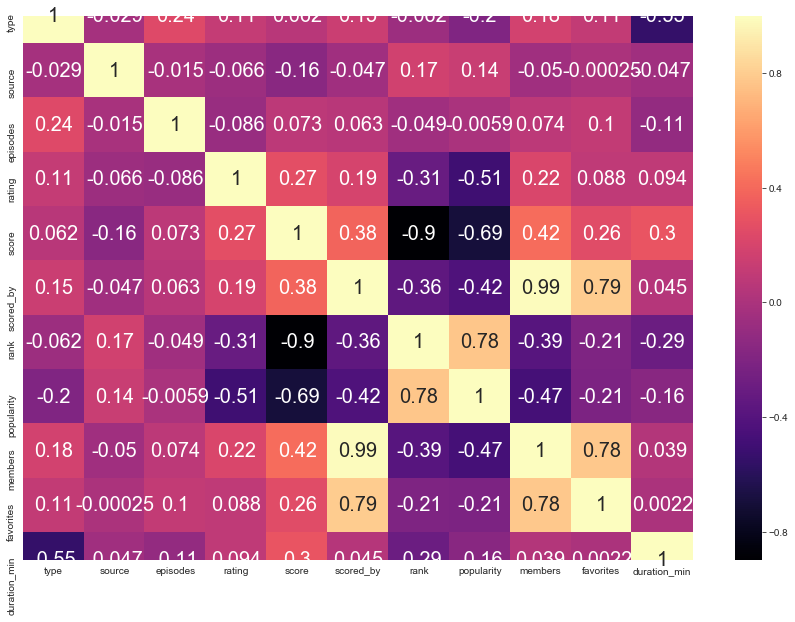

In [25]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


### OLM for rank~score

In [26]:
abs(corr).sort_values(by = 'rank',  ascending= False)['rank']
data_reg_simple = ols(formula= "rank~score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 2.651e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:36:02   Log-Likelihood:                -54637.
No. Observations:                6312   AIC:                         1.093e+05
Df Residuals:                    6310   BIC:                         1.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.514e+04    128.987    194.868      0.000    2.49e+04    2.54e+04
score      -3031.4230     18.618   -162.822      0.000   -3067.921   -2994.925
==============================================================================
Omnibus:                     3194.389   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177636.065
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      28.779   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for popularity~rank

In [27]:
abs(corr).sort_values(by = 'popularity',  ascending= False)['popularity']
data_reg_simple = ols(formula= "popularity~rank", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     9632.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:36:02   Log-Likelihood:                -57585.
No. Observations:                6312   AIC:                         1.152e+05
Df Residuals:                    6310   BIC:                         1.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    699.3556     47.238     14.805      0.000     606.754     791.957
rank           0.8642      0.009     98.145      0.000       0.847       0.881
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.519
Skew:                           0.022   Prob(JB):                        0.772
Kurtosis:                       2.998   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for score~popularity

In [28]:
abs(corr).sort_values(by = 'score',  ascending= False)['score']
data_reg_simple = ols(formula= "score~popularity", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     5792.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:36:02   Log-Likelihood:                -6510.2
No. Observations:                6312   AIC:                         1.302e+04
Df Residuals:                    6310   BIC:                         1.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6830      0.014    559.150      0.000       7.656       7.710
popularity    -0.0002   2.42e-06    -76.107      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     1510.313   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7590.225
Skew:                          -1.062   Prob(JB):                         0.00
Kurtosis:                       7.935   Cond. No.                     9.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for members~scored_by

In [29]:
abs(corr).sort_values(by = 'members',  ascending= False)['members']
data_reg_simple = ols(formula= "members~scored_by", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                members   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.392e+05
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:36:02   Log-Likelihood:                -70531.
No. Observations:                6312   AIC:                         1.411e+05
Df Residuals:                    6310   BIC:                         1.411e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7021.2227    234.020     30.003      0.000    6562.463    7479.982
scored_by      1.6961      0.003    489.098      0.000       1.689       1.703
==============================================================================
Omnibus:                     2598.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           592802.892
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                      50.450   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the relationships between the different categories

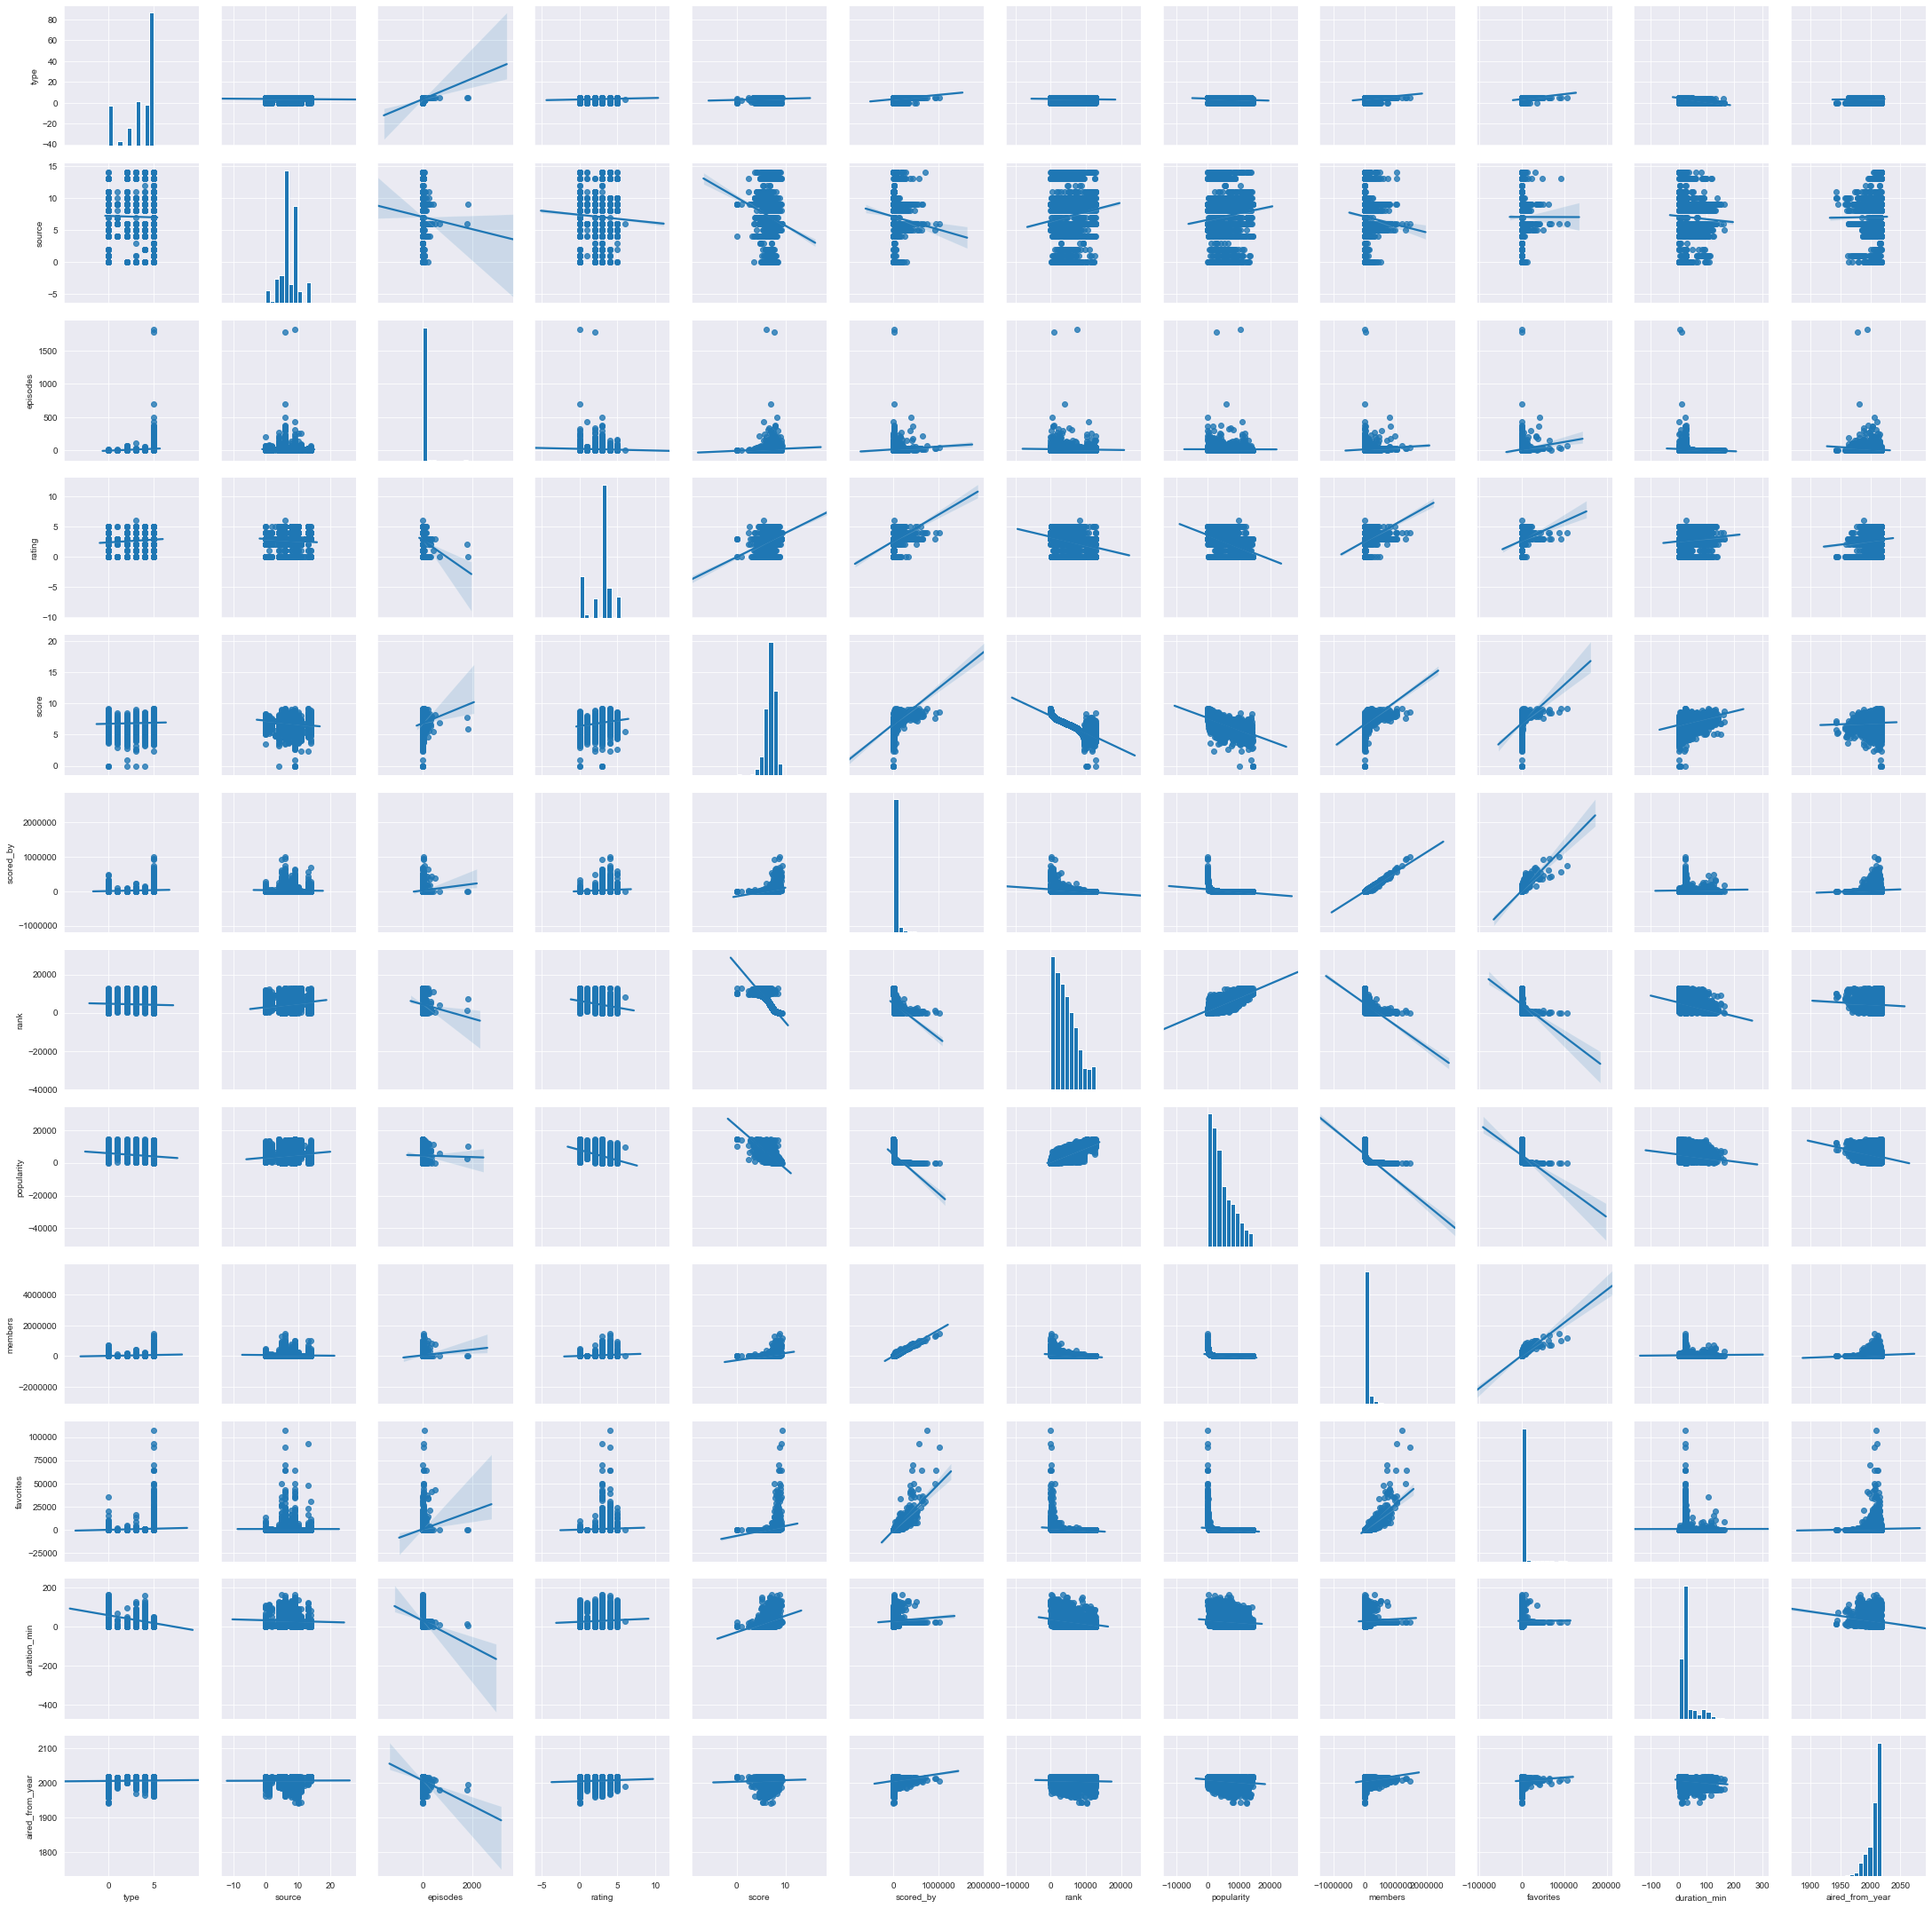

In [30]:
sns.pairplot(data_le, kind='reg' )

Visualizing relationship with each column of my dataset

In [31]:
# sns.pairplot(data_le, hue ='type')

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

Error in callback <function flush_figures at 0x000001EB80C93AF8> (for post_execute):


KeyboardInterrupt: 

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


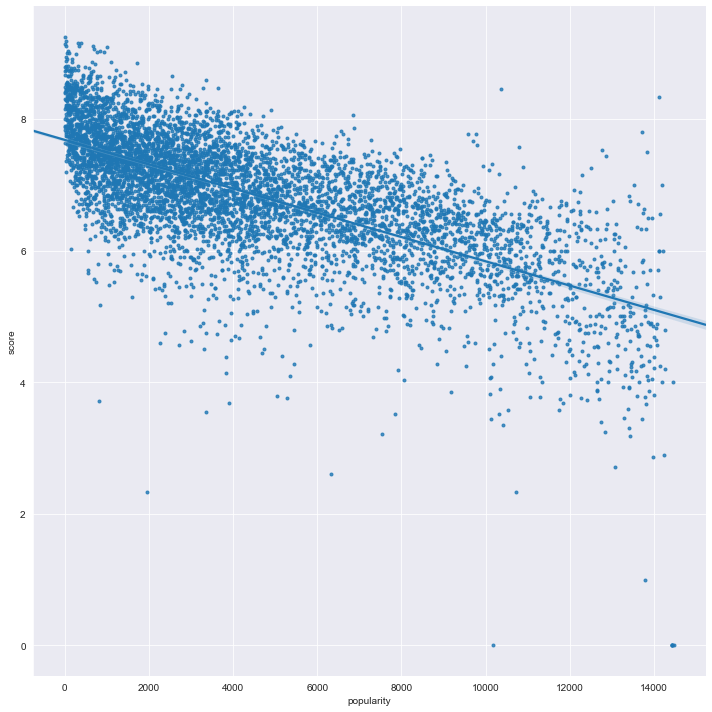

In [32]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)


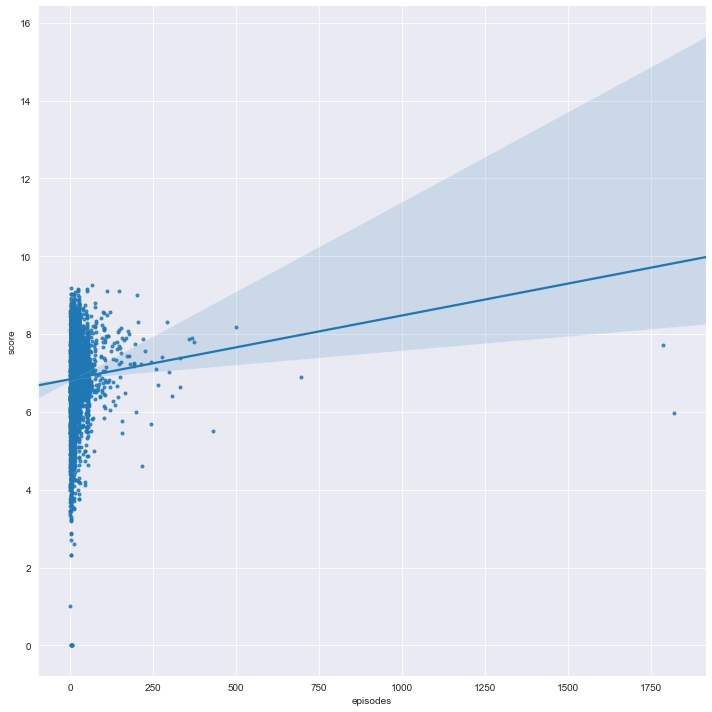

In [33]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)

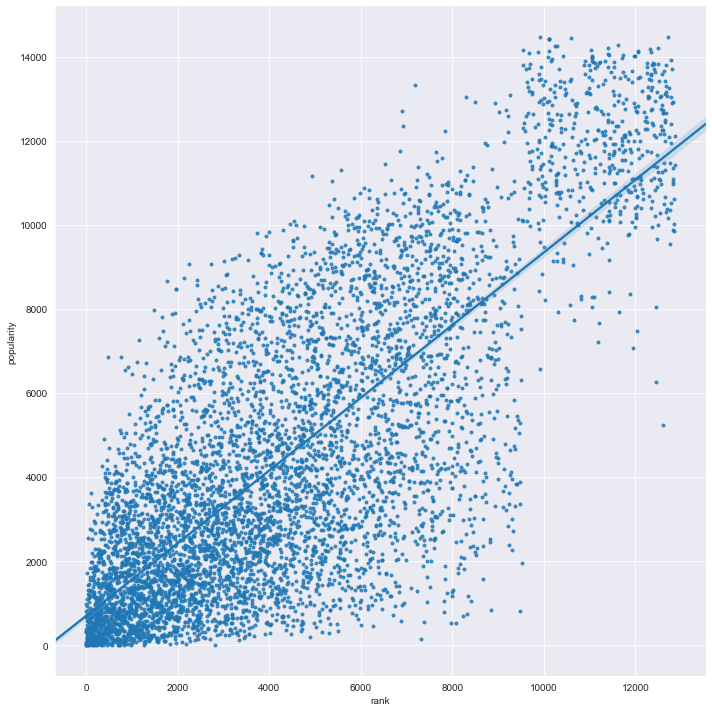

In [34]:
sns.lmplot(x='rank', y='popularity', data= data, markers=["."], fit_reg =True,size = 10)

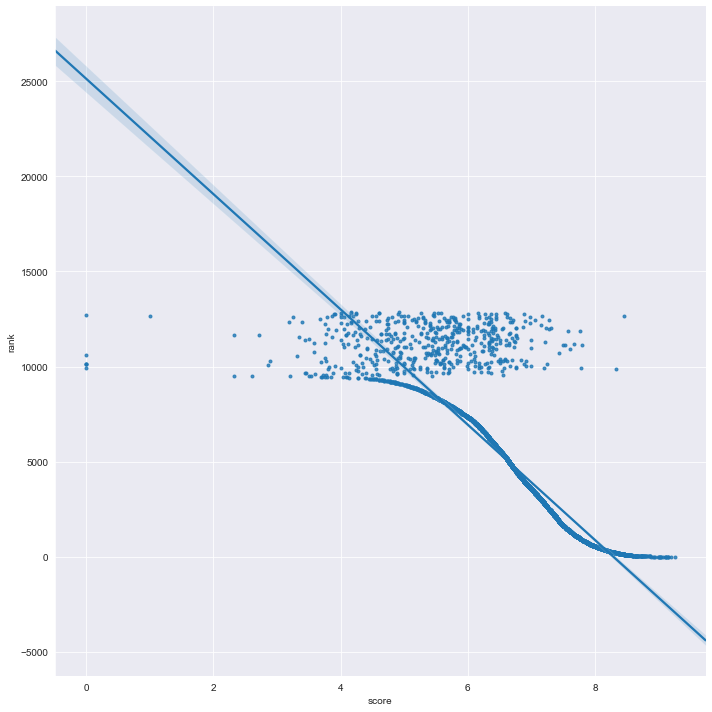

In [35]:
sns.lmplot(x='score', y='rank', data= data, markers=[ "."], fit_reg =True,size = 10)

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x1eb97466448>,
 <a list of 6 Text xticklabel objects>)

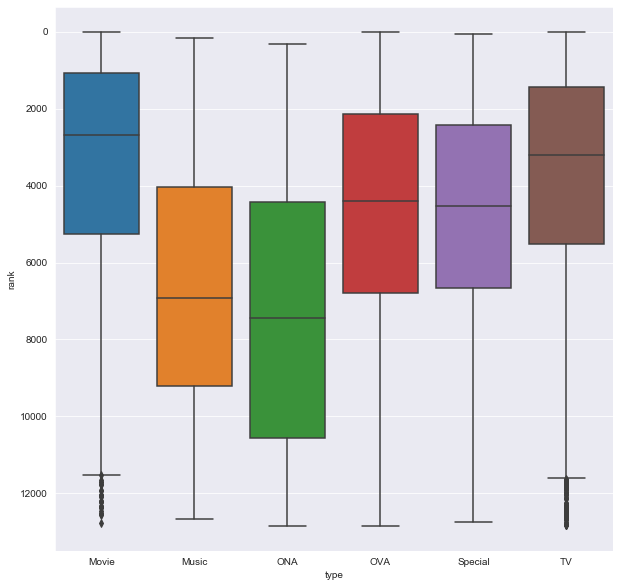

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1eb979379c8>,
 <a list of 6 Text xticklabel objects>)

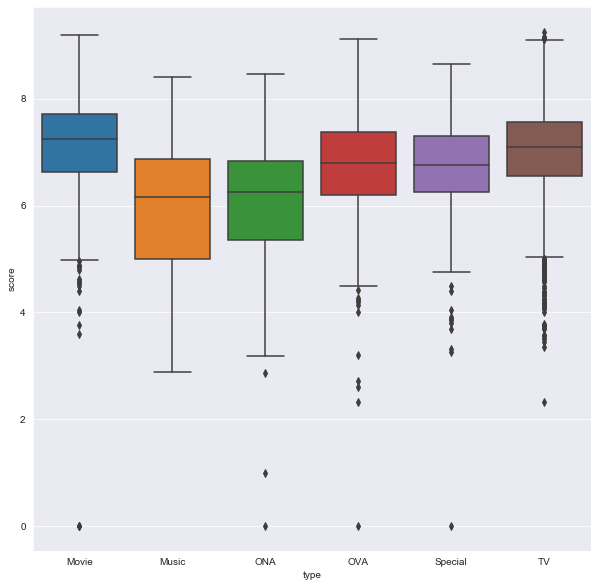

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

([<matplotlib.axis.XTick at 0x1eb977c90c8>,
 <a list of 15 Text xticklabel objects>)

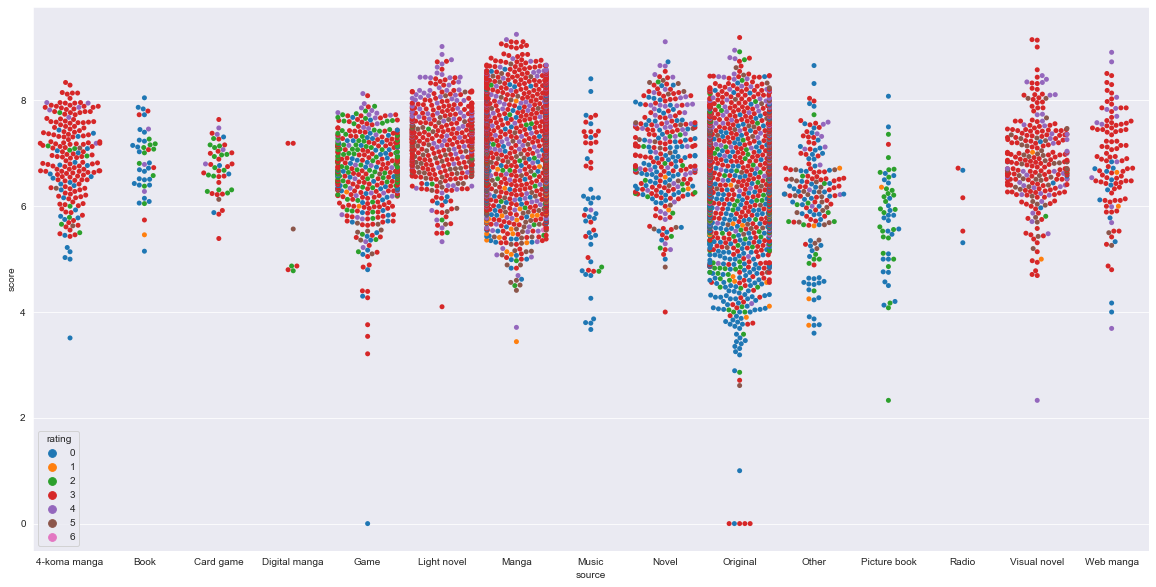

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(data_list_source)), data_list_source)


In [39]:
data.columns

Index(['title', 'type', 'source', 'episodes', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'duration_min',
       'aired_from_year'],
      dtype='object')

C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


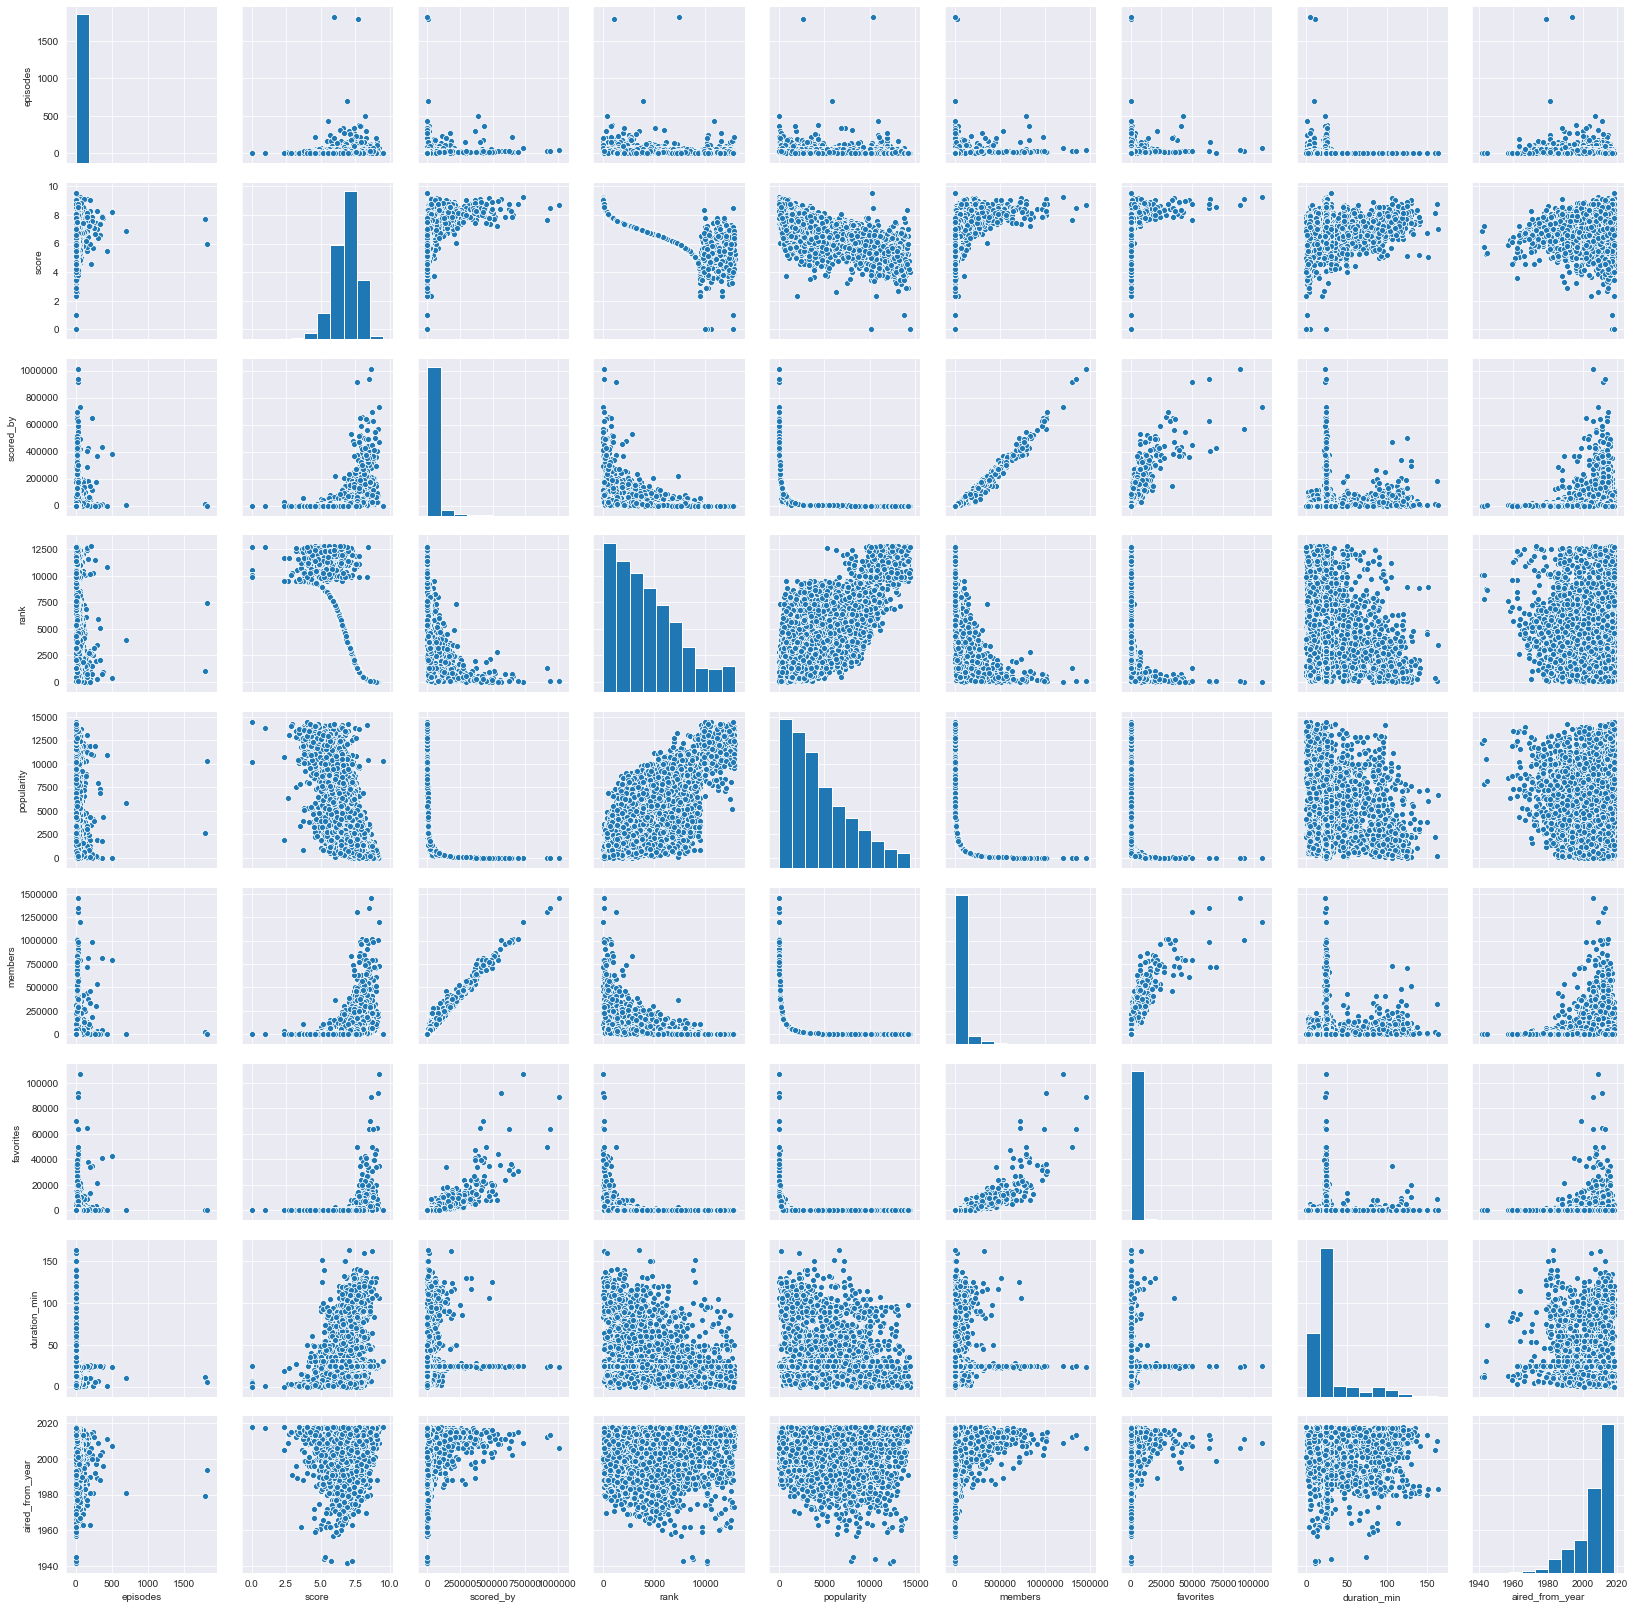

In [40]:
sns.pairplot(data_number_set)

ValueError: cannot convert float NaN to integer

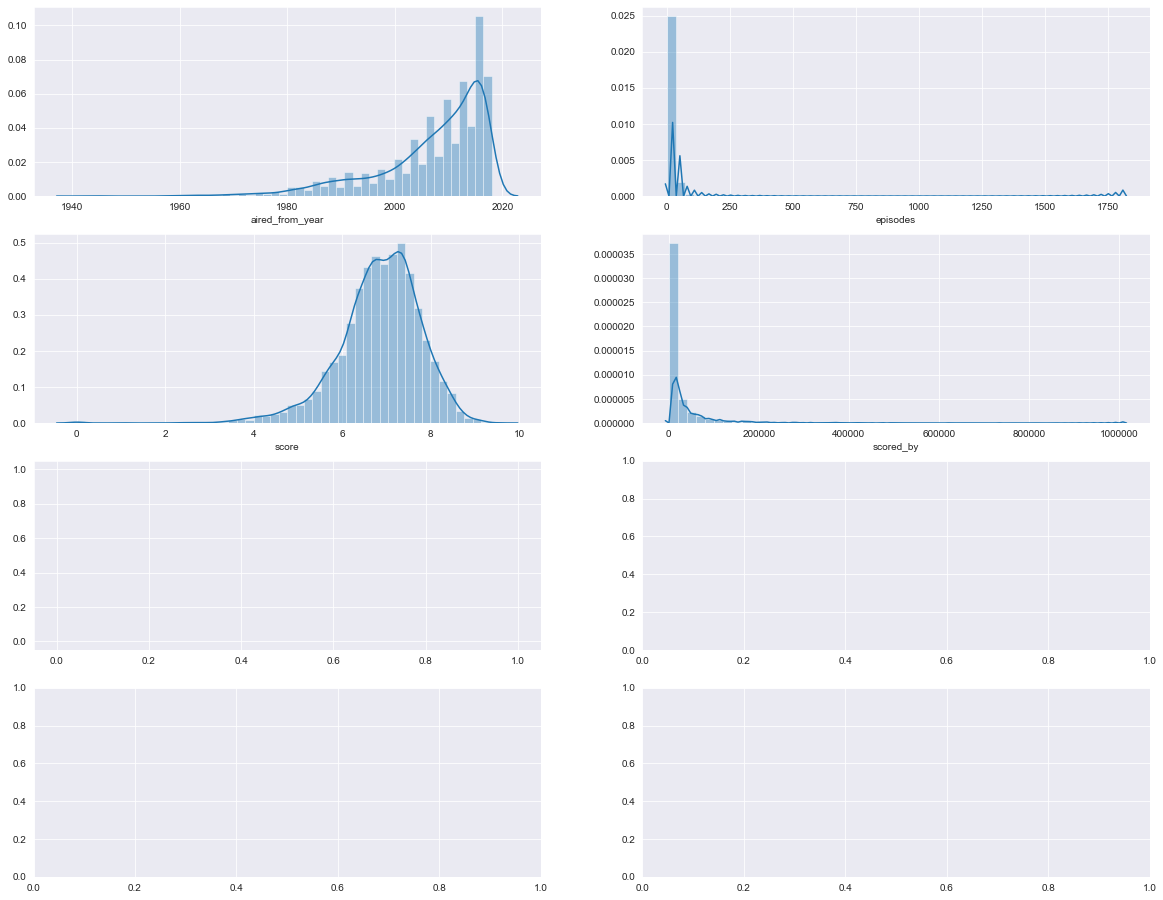

In [41]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_number_set.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

### This pairing showed the highest correlation

# Total # of Scores vs Total # of Members

In [42]:
#selecting the columns in the data and labeling them 
rank=data_le.iloc[:,7]
popularity=data_le.iloc[:,8]
score_by=data_le.iloc[:,6]
score=data_le.iloc[:,5]
members=data_le.iloc[:,9]


#Assigning X and y values aswell as the train and test of X and y

X1 = score_by.values.reshape(-1,1)
y1 = members.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)



In [43]:
y1_test.shape

(1894,)

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [44]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.9740893201397741
Linear Regression test accuracy is: 0.9748442529239484
Avg Cross Val Linear Regression is: 0.9732720875461481


In [45]:
scored_by_test = X1_test.reshape(1, -1)
members_test = y1_test.reshape(1, -1)
lr_members_predict = y1_pred_lr.reshape(1, -1)
cross_val_lr_members_predict = cv_pred_lr.reshape(1, -1)

d1 = pd.DataFrame(np.hstack([y1_test]))
d2 = pd.DataFrame(np.hstack([y1_pred_lr]))
d3 = pd.DataFrame(np.hstack([cv_pred_lr]))

# pd.DataFrame([[y1_test],[y1_pred_lr],[cv_pred_lr]])
# df1_transposed = df1.transpose()
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)


pd.DataFrame(np.concatenate([df1, df2, df3], axis=1), columns= ['Test set Members','Linear Reg Predicted Members','Cross Val. Linear Reg Predicted Members '])



,Test set Members,Linear Reg Predicted Members,Cross Val. Linear Reg Predicted Members
0,7273.0,12159.191254,11697.609079
1,1810.0,8752.564939,8246.640847
2,4730.0,11560.409866,11091.033729
3,345.0,7243.771160,6718.208045
4,361.0,7208.250230,6682.224761
...,...,...,...
1889,7316.0,9941.670351,9214.437945
1890,17569.0,18221.429939,17596.557166
1891,890.0,7318.195965,6558.530506
1892,89699.0,76262.629222,76355.298528


In [46]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.9740893201397741
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9748442529239484
Ridge Regression @ alpha = 100 train accuracy is:  0.9740893201397741
Ridge Regression @ alpha = 100 test accuracy is:  0.9748442529238408
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.9732720875461481
Avg Cross Val Ridge Regression alpha @ 100 is:  0.9732720875461152


In [47]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.01 test accuracy is:  0.9748442529239203
Lasso Regression @ alpha 0.05 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.05 test accuracy is:  0.9748442529238078
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9732720875461363
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.9732720875460894


In [48]:
#LogisticRegression
logreg= LogisticRegression(C=1,fit_intercept=True)
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train,y1_train)

logreg_accuracy_test = logreg.score(X1_test,y1_test)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)


C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression train accuracy is 0.00022634676324128565 and Logistic Regression test accuracy is 0.0
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9732720875461363


In [49]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn5_accuracy_train = knn5.score(X1_train,y1_train)
knn5_accuracy_test = knn5.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


K_nearest Neighbor = 1 Regression train accuracy is 0.0
K_nearest Neighbor = 1 Regression test accuracy is 0.8817317845828934

K_nearest Neighbor = 5 Regression train accuracy is 0.0
K_nearest Neighbor = 5 Regression test accuracy is 0.1979936642027455


In [50]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)
 
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1} and Random Forest Classifier test accuracy is {rf_accuracy_test_1}')


Random Forest Classifier train accuracy is 0.8026256224535989 and Random Forest Classifier test accuracy is 0.0


Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [51]:

# k_range= range(1,20)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1_train, y1_train)
# #     y1_pred_knn = knn.predict(X1_test)
#     scores.append(knn.score(X1_test,y1_test))
# plt.plot(k_range,scores)


# Ploting the Predicted Values for each model

Original Dataset


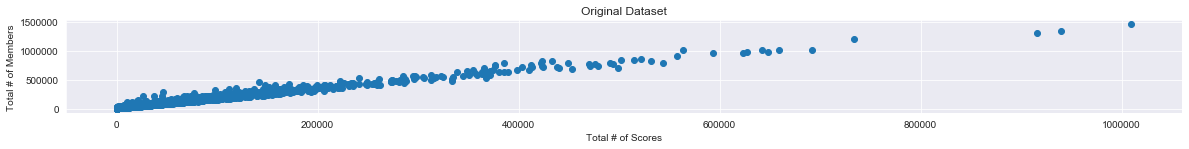

Predicted Model for Linear Regression


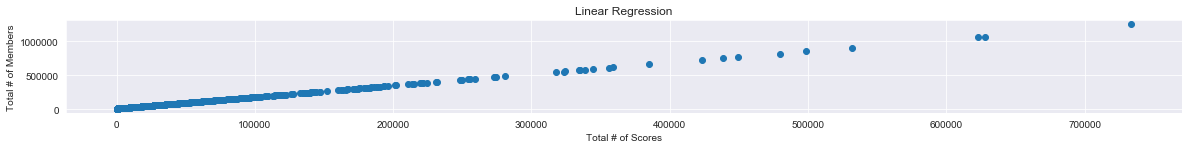

Predicted Cross Validation Model for Linear Regression


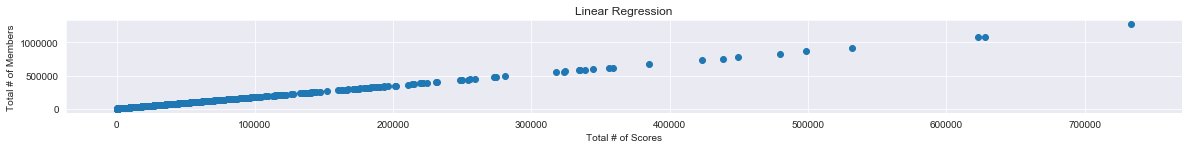

Predicted Model for Logistic Regression


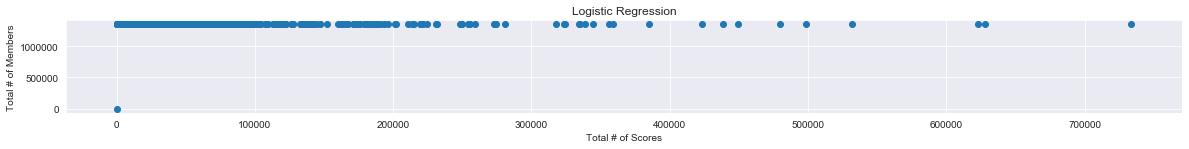

Predicted Model for Ridge Regression @ alpha = 0.01


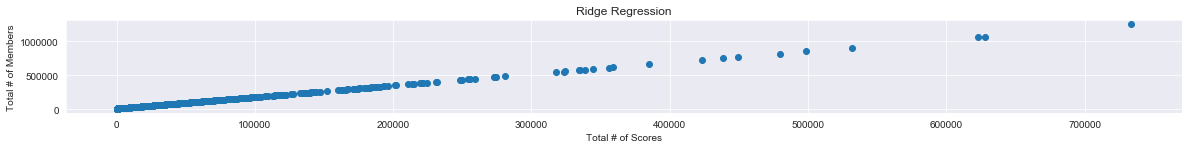

Predicted Model for Lasso Regression @ alpha = 0.01


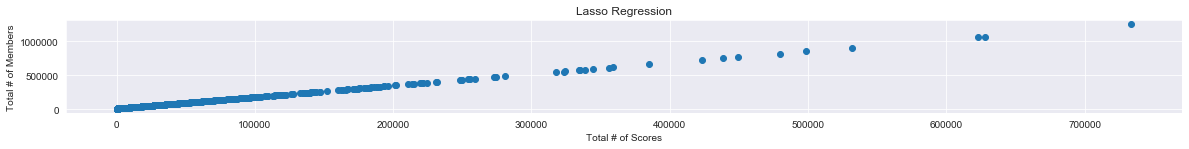

Predicted Model for K-nearest Neighbors Regression @ 1


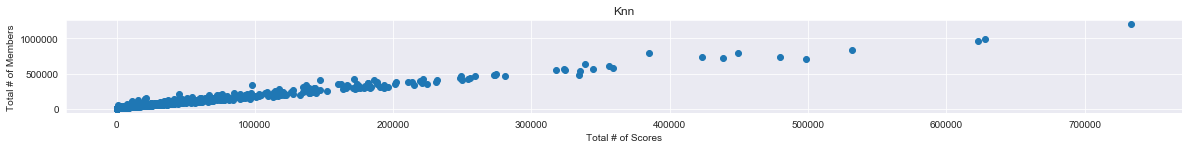

Predicted Model for Random Forest Classifier @ N Estimators 100


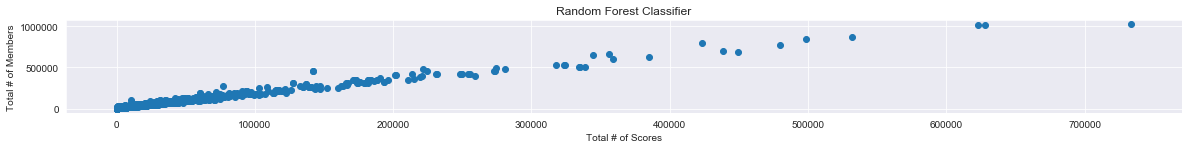

In [52]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_logreg)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Logistic Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(818)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Rank against Score

In [53]:
#Assigning X and y values aswell as the train and test of X and y
X2 = rank.values.reshape(-1,1)
y2 = score.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [54]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


Linear Regression train accuracy is: 0.813927834467458
Linear Regression test accuracy is: 0.780950853730388
Avg Cross Val Linear Regression is: 0.8165595808980379


In [55]:
X2_test.shape

(1263, 1)

In [56]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.813927834467458
Ridge Regression test accuracy is: 0.7809508537304117
Ridge Regression train accuracy is: 0.813927834467458
Ridge Regression test accuracy is: 0.7809508539669692


In [57]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.8139278344561724
Lasso Regression @ alpha 0.01 test accuracy is: 0.7809512958384164
Lasso Regression @ alpha 0.00001 train accuracy is: 0.813927834467458
Lasso Regression @ alpha 0.00001 test accuracy is: 0.7809508541725085


Original Data


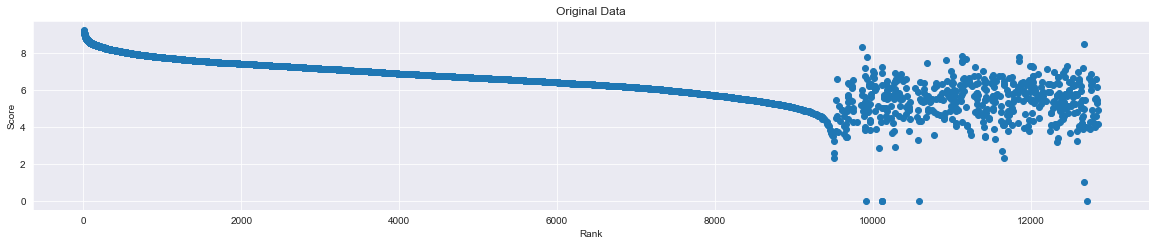

Predicted Model Linear Regression


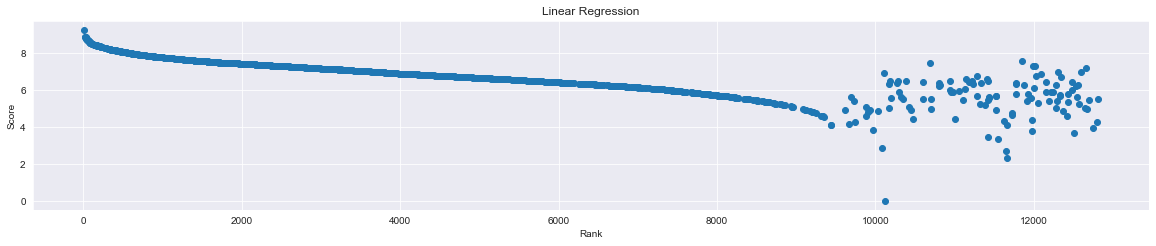

Predicted Cross Validation Model Linear Regression


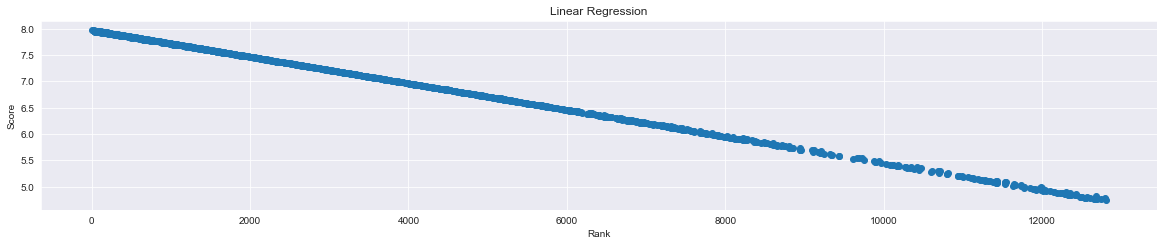

Predicted Model Ridge Regression


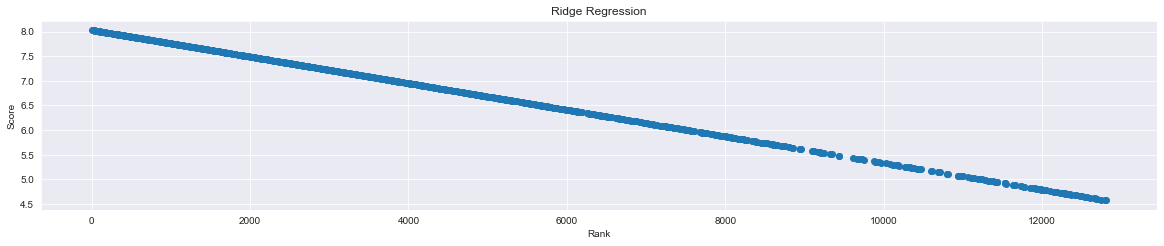

Predicted Model Lasso Regression


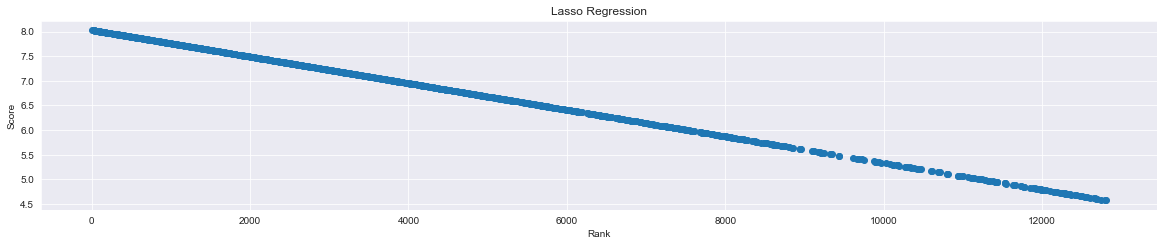

In [58]:
# ploting Linear Regression model

print('Original Data')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2,y2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Original Data')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Cross Validation Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,cv_pred_lr2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_rr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lasso01)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.show()